# 목표 :
###  Class와 def 으로 모듈화된 기계학습 프로세스를 학습 과정까지 구현해본다.
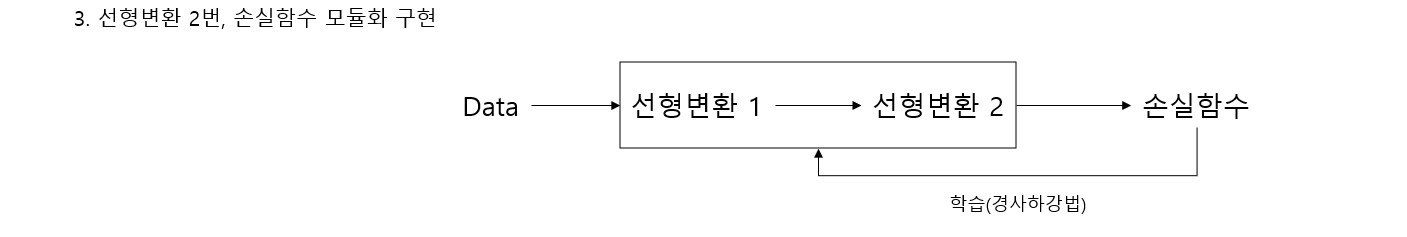

# 
### 3번 문제 : 앞에서 설계한 LinearModel 클래스를 사용하여 선형변환이 2번 있고 MeanSquaredError를 손실함수로 사용하는 클래스를 사용하여 전파(forward)와 역전파(backward) 값을 단계별로 출력해보세요
1. 입력 x = 2, 정답 t = 1
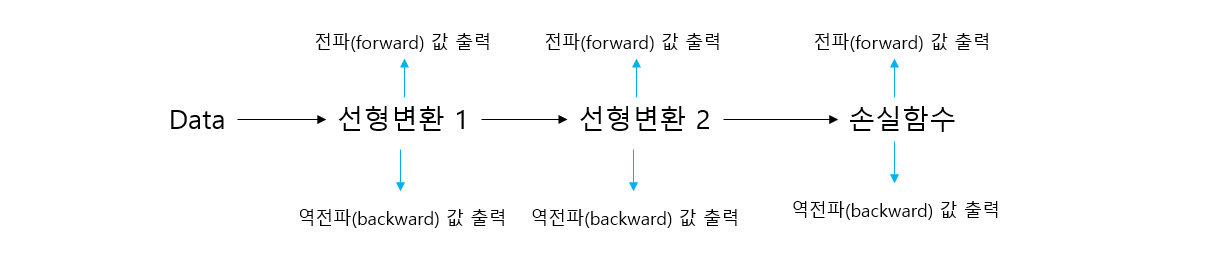

In [5]:
class MeanSquaredError:
    def __init__(self):
        self.y = None
        self.t = None

    def forward(self, y, t):
        self.y = y
        self.t = t
        return 0.5*(y-t)**2  # 0.5 * (y - t) ** 2 계산 결과 반환

    def backward(self, dout= 1):
        return (self.y - self.t)*dout  # y - t 반환

In [ ]:
import numpy as np
  
class LinearModel:
    def __init__(self):
        np.random.seed(1) # 랜덤 시드 고정
        self.w_1 = np.random.randn(1)  # w 값을 저장 (가증치)
        self.b_1 = np.zeros(1)  # b 값을 저장 (편향)

        self.w_2 = np.random.randn(1)  # w 값을 저장
        self.b_2 = np.zeros(1)  # b 값을 저장

    def forward_1(self, x):
        self.x = x
        return self.w_1*self.x + self.b_2  # wx + b 계산 결과 반환

    def backward_1(self, dout=1):
        dx = self.w_1 * dout  
        dw =  self.x * dout
        db = 1.0 * dout
        return dx, dw, db
    
    def forward_2(self, x):
        self.x = x
        return self.w_2*self.x + self.b_2  # wx + b 계산 결과 반환

    def backward_2(self, dout=1):
        dx = self.w_2 * dout  
        dw =  self.x * dout
        db = 1.0 * dout
        return dx, dw, db

In [14]:
mobel = LinearModel()
mse = MeanSquaredError()

x = 2
t = 1

print(mobel.w_1)
print(mobel.w_2)
#1차 선형변환
out_1 = mobel.forward_1(x)
print(f'1차 선형변화{out_1}')

#2차 선형변환
out_2_1 = mobel.forward_2(out_1)
dx, dw, db = mobel.backward_1()
out_2_2 = mobel.forward_2(dx)
print(f'2차 선형변화{out_2_1}')
print(f'2차 선형변환(다른값): {out_2_2}')

#손싷 함수
out_3_1 = mse.forward(out_2_1, t)
out_3_2 = mse.forward(out_2_2, t)
print(f'손실함수 값:{out_3_1}')
print(f'손실함수 값(다른 값):{out_3_2}')

dout = mse.backward()
dx, dw, db = mobel.backward_1(dout)
dx_2, dw_2, db_2 = mobel.backward_2(dout)

print(dx,dx_2)

[1.62434536]
[-0.61175641]
1차 선형변화[3.24869073]
2차 선형변화[-1.98740739]
2차 선형변환(다른값): [-0.99370369]
손실함수 값:[4.46230145]
손실함수 값(다른 값):[1.98742721]
[-3.23846335] [1.21966102]


# 
#### 3-1번 문제 : 두 개 선형변환이 있고 MSE 손실함수를 사용하는 모델에 대해 입력 x=2 , 정답 t=1 인 경우에 경사하강법으로 학습하는 코드를 작성하세요.
1. x =2, t=1 주어짐.
2. 두 개 LinearModel 의 파라미터들이 update 되어야함.
3. 학습률 = 0.01
4. 100번의 경사하강법 과정에서 매 과정마다 예측값과 손실값 출력
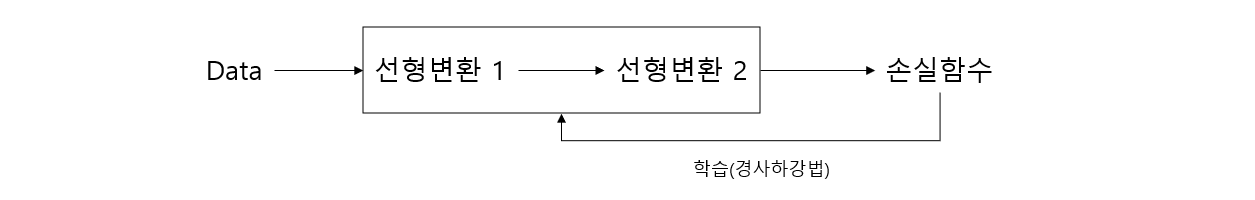

In [ ]:
x = 2
t = 1
lr = 0.01

In [ ]:
mobel = LinearModel()
mse = MeanSquaredError()

x = 2
t = 1
lr = 0.01

for i in range(100):
    #1차 선형변환
    out_1 = mobel.forward_1(x)
    
    #2차 선형변환
    dx, dw, db = mobel.backward_1(dout)
    out_2_2 = mobel.forward_2(dx)

    #싷 함수
    out_3 = mse.forward(out_2_2, t)

    #역전파
    dout = mse.backward()
    dx, dw, db = mobel.backward_1(dout)
    dx_2, dw_2, db_2 = mobel.backward_2(dout)

    #업데이트
    mobel.w_1 = mobel.w_1 - lr * dw
    mobel.b_1 = mobel.b_1 - lr * db

    mobel.w_2 = mobel.w_2 - lr * dw
    mobel.b_2 = mobel.b_2 - lr * db
    print(f'에측값:{mobel.forward_2(x)}')
    print(f'손실값:{out_3}')

에측값:[-1.01521557]
손실값:[4.19040836]
에측값:[-0.87068741]
손실값:[1.31144839]
에측값:[-0.71598975]
손실값:[2.57852742]
에측값:[-0.66959304]
손실값:[0.19394976]
에측값:[-0.62331629]
손실값:[0.95405967]
에측값:[-0.62677102]
손실값:[0.0032927]
에측값:[-0.62051696]
손실값:[0.40898544]
에측값:[-0.62949684]
손실값:[0.06796235]
에측값:[-0.63228367]
손실값:[0.24779913]
에측값:[-0.64014234]
손실값:[0.1122686]
에측값:[-0.64496624]
손실값:[0.18956385]
에측값:[-0.65164862]
손실값:[0.12997113]
에측값:[-0.6568355]
손실값:[0.16341226]
에측값:[-0.66271269]
손실값:[0.13468171]
에측값:[-0.66779129]
손실값:[0.14905751]
에측값:[-0.67309339]
손실값:[0.13384187]
에측값:[-0.67791987]
손실값:[0.13965414]
에측값:[-0.68277274]
손실값:[0.1307461]
에측값:[-0.68730805]
손실값:[0.13258816]
에측값:[-0.69178474]
손실값:[0.12680563]
에측값:[-0.69602686]
손실값:[0.12676388]
에측값:[-0.70017453]
손실값:[0.12262647]
에측값:[-0.70413484]
손실값:[0.1216839]
에측값:[-0.70798734]
손실값:[0.11846918]
에측값:[-0.71168176]
손실값:[0.11710427]
에측값:[-0.71526545]
손실값:[0.11444316]
에측값:[-0.71871083]
손실값:[0.11289516]
에측값:[-0.72204749]
손실값:[0.11059035]
에측값:[-0.72526024]
손실값:[0.

In [8]:
#2차 선형 변환에 dx를 넣었을 경우
mobel = LinearModel()
mse = MeanSquaredError()

x = 2
t = 1
lr = 0.01

for i in range(100):
    #1차 선형변환
    out_1 = mobel.forward_1(x)
    
    #2차 선형변환
    out_2 = mobel.forward_2(out_1)

    #싷 함수
    out_3 = mse.forward(out_2, t)

    #역전파
    dout = mse.backward()
    dx, dw, db = mobel.backward_1(dout)
    dx_2, dw_2, db_2 = mobel.backward_2(dout)

    #업데이트
    mobel.w_1 = mobel.w_1 - lr * dw
    mobel.b_1 = mobel.b_1 - lr * db

    mobel.w_2 = mobel.w_2 - lr * dw
    mobel.b_2 = mobel.b_2 - lr * db
    print(f'에측값:{mobel.forward_2(x)}')
    print(f'손실값:{out_3}')

에측값:[-0.9995355]
손실값:[4.46230145]
에측값:[-0.78044089]
손실값:[3.8019715]
에측값:[-0.57175846]
손실값:[3.09804979]
에측값:[-0.37872864]
손실값:[2.40527979]
에측값:[-0.20561841]
손실값:[1.77530434]
에측값:[-0.05516856]
손실값:[1.24531372]
에측값:[0.0716617]
손실값:[0.8316665]
에측값:[0.17559194]
손실값:[0.53072179]
에측값:[0.25863045]
손실값:[0.32525695]
에측값:[0.32355307]
손실값:[0.19255739]
에측값:[0.37340762]
손실값:[0.11078056]
에측값:[0.41114157]
손실값:[0.06228446]
에측값:[0.43937925]
손실값:[0.03439248]
에측값:[0.46032669]
손실값:[0.01872939]
에측값:[0.47576352]
손실값:[0.01009303]
에측값:[0.48708313]
손실값:[0.00539641]
에측값:[0.49535319]
손실값:[0.0028685]
에측값:[0.50137888]
손실값:[0.00151823]
에측값:[0.50576059]
손실값:[0.00080104]
에측값:[0.50894221]
손실값:[0.00042167]
에측값:[0.51124999]
손실값:[0.00022159]
에측값:[0.51292264]
손실값:[0.00011631]
에측값:[0.51413428]
손실값:[6.09937982e-05]
에측값:[0.51501162]
손실값:[3.19653656e-05]
에측값:[0.51564671]
손실값:[1.67444755e-05]
에측값:[0.51610633]
손실값:[8.76833245e-06]
에측값:[0.51643893]
손실값:[4.5904626e-06]
에측값:[0.51667957]
손실값:[2.40280849e-06]
에측값:[0.51685367]
손실값:[1.